<a href="https://colab.research.google.com/github/jackshiels/casa0018/blob/main/LegoRecogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lego Recognizer

In [2]:
# Extract the lego images
import os
import zipfile

local_zip = '/content/LegoImages.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [3]:
# Import the transfer data set
from keras.applications.vgg16 import VGG16

model = VGG16()

553467096/553467096 [==============================] - 20s 0us/step


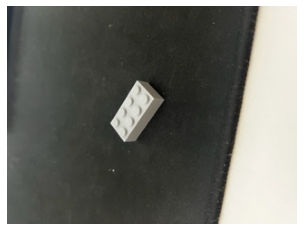

In [6]:
# Show an image to test they are working
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/content/LegoImages/training/2x4/IMG_5039.jpg")
plt.imshow(img)
plt.axis('Off')
plt.show()

In [12]:
# Create the new model from VGG16
import tensorflow as tf
from keras import preprocessing
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

training_dir = "/content/LegoImages/training"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

validation_dir = "/content/LegoImages/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size = (150, 150),
    class_mode = "categorical",
    batch_size = 126
)

label_map = (train_generator.class_indices)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    class_mode = "categorical",
    batch_size = 126
)

Found 81 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [11]:
# Create the VGG16 basis
image_size = [150, 150]
pretrained_model = VGG16(weights = "imagenet",
                         include_top = False,
                         input_shape = [*image_size, 3])

pretrained_model.trainable = False
model = tf.keras.Sequential([pretrained_model,
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(3, activation = "softmax")])

model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 3)                 24579     
                                                                 
Total params: 14,739,267
Trainable params: 24,579
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
# Train the Lego model
history = model.fit(train_generator,
                    epochs = 100,
                    validation_data = validation_generator,
                    verbose = 1)
model.save("LegoRecognizer.h5")

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.3209 - accuracy: 0.9136 - val_loss: 0.6095 - val_accuracy: 0.6970
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.3828 - accuracy: 0.8765 - val_loss: 0.6278 - val_accuracy: 0.6970
Epoch 3/100
1/1 [==============================] - 1s 860ms/step - loss: 0.3884 - accuracy: 0.8765 - val_loss: 0.6487 - val_accuracy: 0.7273
Epoch 4/100
1/1 [==============================] - 1s 828ms/step - loss: 0.2775 - accuracy: 0.9136 - val_loss: 0.6714 - val_accuracy: 0.7273
Epoch 5/100
1/1 [==============================] - 1s 821ms/step - loss: 0.3595 - accuracy: 0.8642 - val_loss: 0.6944 - val_accuracy: 0.7273
Epoch 6/100
1/1 [==============================] - 1s 827ms/step - loss: 0.3124 - accuracy: 0.8642 - val_loss: 0.7134 - val_accuracy: 0.6364
Epoch 7/100
1/1 [==============================] - 1s 819ms/step - loss: 0.2855 - accuracy: 0.9506 - val_loss: 0.7260 - val_accuracy: 0.6364
Epoch 8/100
1/1 [==

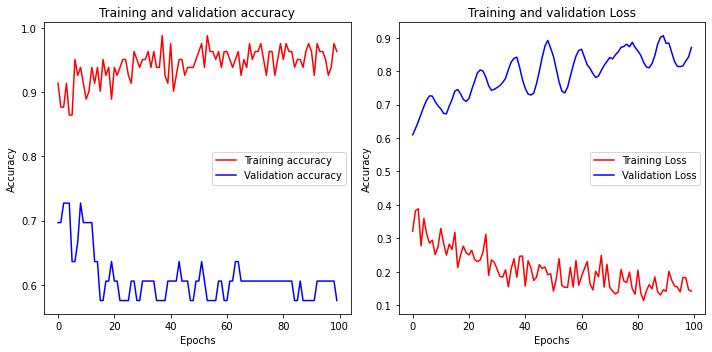

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.subplot(1, 2, 2)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.tight_layout()

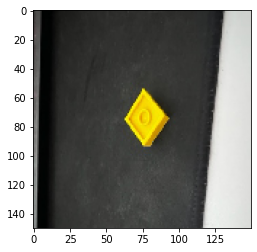

1/1 [==============================] - 0s 42ms/step
I think the image above is "2x2" and I am 100.00% confident.
[1.0000000e+00 1.7448341e-08 0.0000000e+00]


In [30]:
# Test this model
import numpy as np
from google.colab import files
from keras.preprocessing import image
from keras.utils import load_img
from keras.utils import img_to_array

# Load
img = load_img('/content/2x2.jpg', target_size=(150, 150))

plt.imshow(img)
plt.show()

# Convert to array
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])

# Run pred
p = model.predict(images)

# Classify
predicted = np.argmax(model.predict(x), axis = -1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in predicted]

print('I think the image above is "%s" and I am %.2f%% confident.' % (pred[0], p[0][predicted]*100))

print(p[0])